
# Load the various utility libraries

In [1]:

# Install the Networkx library
!pip install networkx

In [2]:
# %load ../../load_magic/storage1.py

current_directory = !echo %cd%
folder_list = current_directory[0].split('\\')
%run ../../load_magic/storage2.py {len(folder_list) - folder_list.index('ipynb')}
%who

data_folder = ../data/
saves_folder = ../saves/
attempt_to_pickle	 current_directory	 data_folder	 encoding	 folder_list	 load_csv	 load_dataframes	 load_object	 os	 
pd	 pickle	 save_dataframes	 saves_folder	 store_objects	 sys	 



# Explore various graph colorings

It turns out it is hard to create a visualization that lets you see each node an edge. Prehaps coloring the nodes strategically will help.

In [3]:

import matplotlib.pyplot as plt
import networkx as nx
import re
import numpy as np
%matplotlib inline

pos_dict = load_object('pos_dict')
jung_digraph = load_object('jung_digraph')

In [4]:

def draw_influences_digraph(influences_digraph, birth_year_based_layout):
    
    # Create x axis labels
    xtick_list = [int(round(elem)) for elem in pd.cut(np.array([1750, 2000]), 4, retbins=True)[1]]
    xtick_list = [-500] + xtick_list
    nominal_list = [-500, 0, 500, 1000, 1500, 2000]
    xticklabel_list = []
    bc_regex = re.compile(r'-(\d+)')
    for xtick in xtick_list:
        if xtick == 0:
            xticklabel_list.append('')
        elif xtick < 0:
            xticklabel_list.append(bc_regex.sub(r'\1 BC', str(xtick)))
        elif xtick > 0:
            xticklabel_list.append(str(xtick) + ' AD')
    
    # Set up the figure
    jung_fig = plt.figure(figsize=(20, 18))
    ax = jung_fig.add_subplot(111)
    plt.xticks(nominal_list, xticklabel_list, rotation=-45)
    plt.yticks([], [])

    node_collection = nx.draw_networkx_nodes(G=influences_digraph, pos=birth_year_based_layout, alpha=0.5)
    edge_collection = nx.draw_networkx_edges(G=influences_digraph, pos=birth_year_based_layout, alpha=0.5)
    labels_collection = nx.draw_networkx_labels(G=influences_digraph, pos=birth_year_based_layout, font_size=14)

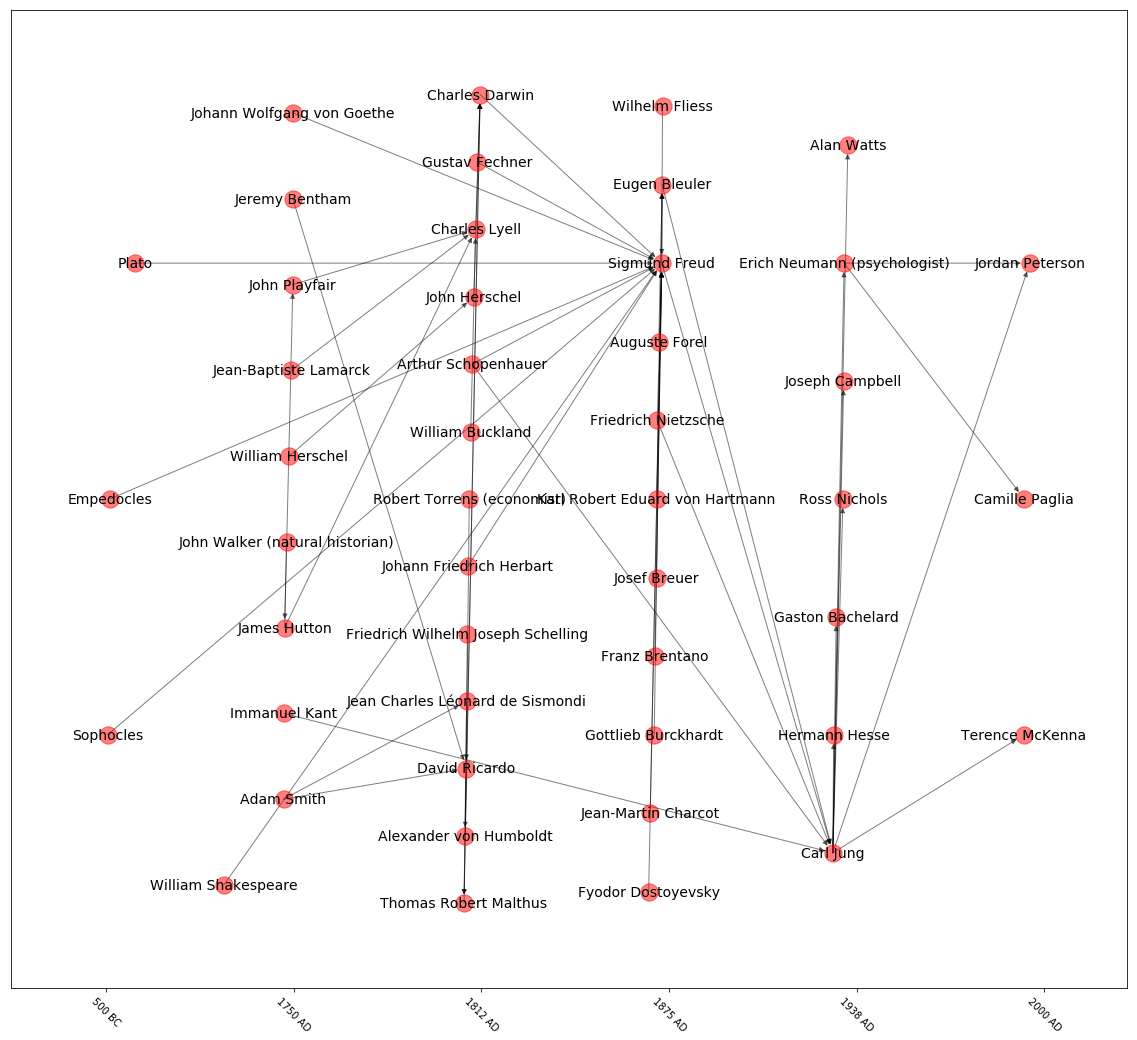

In [5]:

# Draw the influences digraph using the birth-year-based layout
draw_influences_digraph(jung_digraph, pos_dict)


The y axis is just for readability, but the x axis is birth year (with a big gap after 500 BC). It looks kind of like a sailing ship's masts and rigging! It's interesting that, at this time scale, the scientists occur in isolated generations and are not evenly spread through time. So let's see if we can differently color the nodes within any particular generation.

In [6]:

if nx.is_strongly_connected(jung_digraph):
    print(nx.center(jung_digraph, e=None))

There was definitely a flaw in my scraping process. Let's see what subset is actually strongly connected:

In [7]:

%pprint

sorted(nx.strongly_connected_components(jung_digraph), key=len, reverse=True)

Pretty printing has been turned OFF


[{'Joseph Campbell'}, {'Hermann Hesse'}, {'Camille Paglia'}, {'Jordan Peterson'}, {'Erich Neumann (psychologist)'}, {'Ross Nichols'}, {'Alan Watts'}, {'Terence McKenna'}, {'Gaston Bachelard'}, {'Carl Jung'}, {'Eugen Bleuler'}, {'Auguste Forel'}, {'Sigmund Freud'}, {'Franz Brentano'}, {'Josef Breuer'}, {'Jean-Martin Charcot'}, {'Charles Darwin'}, {'Charles Lyell'}, {'John Playfair'}, {'James Hutton'}, {'John Walker (natural historian)'}, {'Jean-Baptiste Lamarck'}, {'William Buckland'}, {'Alexander von Humboldt'}, {'Friedrich Wilhelm Joseph Schelling'}, {'John Herschel'}, {'William Herschel'}, {'Thomas Robert Malthus'}, {'David Ricardo'}, {'Jean Charles Léonard de Sismondi'}, {'Adam Smith'}, {'Jeremy Bentham'}, {'Robert Torrens (economist)'}, {'Fyodor Dostoyevsky'}, {'Empedocles'}, {'Gustav Fechner'}, {'Wilhelm Fliess'}, {'Johann Wolfgang von Goethe'}, {'Karl Robert Eduard von Hartmann'}, {'Johann Friedrich Herbart'}, {'Friedrich Nietzsche'}, {'Plato'}, {'Arthur Schopenhauer'}, {'William

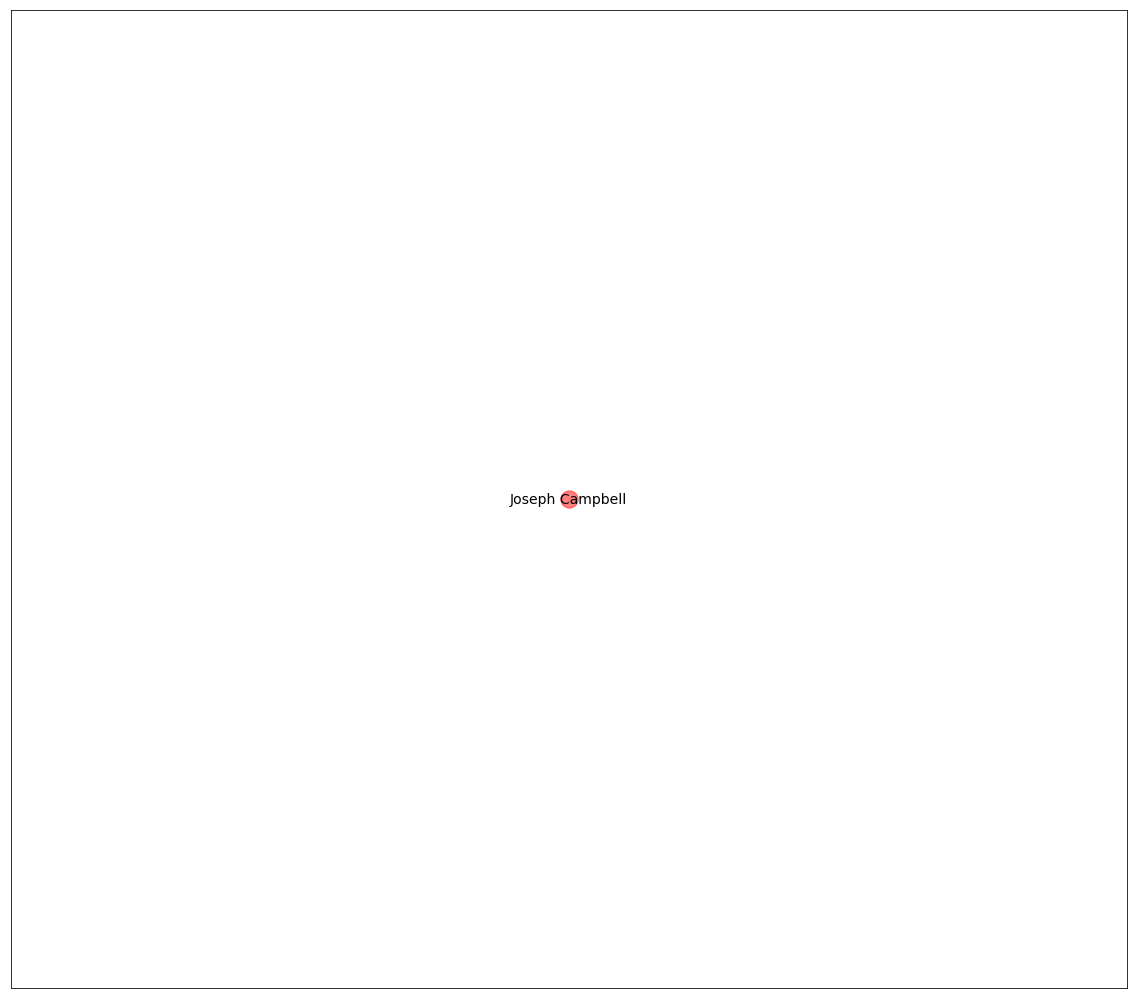

In [8]:

jung_subgraph = jung_digraph.subgraph(max(nx.strongly_connected_components(jung_digraph), key=len))
draw_influences_digraph(jung_subgraph, pos_dict)


This makes sense as there are no cycles, so everything is at once the center and the periphery. Let's look at the built-in coloring schemes. I just grabbed the list of stuff from <code>dir(nx.coloring)</code> that didn't start with an underline.

In [9]:

!"C:\Program Files\Notepad++\notepad++.exe" "c:\users\dev\anaconda3\lib\site-packages\networkx\algorithms\coloring\greedy_coloring.py"

In [10]:

from networkx.algorithms.coloring import greedy_coloring

strategy_list = greedy_coloring.STRATEGIES.keys()
for strategy_name in strategy_list:
    print()
    print(strategy_name)
    try:
        coloring_dictionary = nx.coloring.greedy_color(jung_digraph, strategy=strategy_name)
        print(type(coloring_dictionary))
        print(coloring_dictionary)
    except Exception as e:
        print(e)


largest_first
<class 'dict'>
{'Sigmund Freud': 0, 'Carl Jung': 0, 'Charles Darwin': 1, 'Charles Lyell': 0, 'Eugen Bleuler': 1, 'David Ricardo': 0, 'James Hutton': 1, 'Thomas Robert Malthus': 0, 'Erich Neumann (psychologist)': 0, 'John Playfair': 1, 'Alexander von Humboldt': 0, 'John Herschel': 0, 'Adam Smith': 1, 'Jean Charles Léonard de Sismondi': 1, 'Friedrich Nietzsche': 1, 'Arthur Schopenhauer': 1, 'Jordan Peterson': 0, 'Auguste Forel': 0, 'Franz Brentano': 1, 'Josef Breuer': 1, 'Jean-Martin Charcot': 1, 'John Walker (natural historian)': 0, 'Jean-Baptiste Lamarck': 1, 'William Buckland': 1, 'Friedrich Wilhelm Joseph Schelling': 1, 'William Herschel': 1, 'Jeremy Bentham': 1, 'Robert Torrens (economist)': 1, 'Fyodor Dostoyevsky': 1, 'Empedocles': 1, 'Gustav Fechner': 1, 'Wilhelm Fliess': 1, 'Johann Wolfgang von Goethe': 1, 'Karl Robert Eduard von Hartmann': 1, 'Johann Friedrich Herbart': 1, 'Plato': 1, 'William Shakespeare': 1, 'Sophocles': 1, 'Gottlieb Burckhardt': 0, 'Immanuel Ka


Okay, so it looks like independent_set, largest_first, random_sequential, DSATUR, and saturation_largest_first, are implemented for our directed-type graph and produce a sizeable dictionary. So, how do you use these as colors? The <code>nx.draw_networkx_nodes</code> function has a <code>node_color</code> which takes a color string or an array of floats as input. So how do we get the dictionary output of the coloring strategy into an array of floats with the same length as <code>jung_digraph.nodes()</code>? Let's redefine <code>draw_influences_digraph</code> to add this dictionary as an input.

In [11]:

%run ../../load_magic/charts.py
%who

attempt_to_pickle	 coloring_dictionary	 colormaps_list	 current_directory	 data_folder	 draw_influences_digraph	 encoding	 folder_list	 greedy_coloring	 
jung_digraph	 jung_subgraph	 load_csv	 load_dataframes	 load_object	 np	 nx	 os	 pd	 
pickle	 plt	 pos_dict	 r	 random	 re	 save_dataframes	 saves_folder	 store_objects	 
strategy_list	 strategy_name	 sys	 


In [29]:

def colored_draw_influences_digraph(influences_digraph, birth_year_based_layout=None, strategy_name=None):
    
    # Create x axis labels
    xtick_list = [int(round(elem)) for elem in pd.cut(np.array([1750, 2000]), 4, retbins=True)[1]]
    xtick_list = [-500] + xtick_list
    nominal_list = [-500, 0, 500, 1000, 1500, 2000]
    xticklabel_list = []
    bc_regex = re.compile(r'-(\d+)')
    for xtick in xtick_list:
        if xtick == 0:
            xticklabel_list.append('')
        elif xtick < 0:
            xticklabel_list.append(bc_regex.sub(r'\1 BC', str(xtick)))
        elif xtick > 0:
            xticklabel_list.append(str(xtick) + ' AD')
    
    # Create node color
    if strategy_name is None:
        node_color = 'r'
    else:
        coloring_dict = nx.coloring.greedy_color(influences_digraph, strategy=strategy_name)
        if type(coloring_dict) == dict:
            node_color = [coloring_dict[node] for node in influences_digraph.nodes()]
        else:
            node_color = 'r'
    
    # Set up the figure
    jung_fig = plt.figure(figsize=(20, 18))
    ax = jung_fig.add_subplot(111)
    plt.yticks([], [])
    
    # Set the Strategy name as a text annotation and title
    cmap = r()
    if strategy_name is None:
        ax.set_title('('+cmap+')', size=18)
    else:
        ax.text(0.5, 0.01, strategy_name, transform=ax.transAxes, size=18, ha='center')
        ax.set_title(strategy_name+' ('+cmap+')', size=18)
    
    if birth_year_based_layout is None:
        pos = nx.random_layout(influences_digraph)
    else:
        pos = birth_year_based_layout
        plt.xticks(nominal_list, xticklabel_list, rotation=-45)
    node_collection = nx.draw_networkx_nodes(G=influences_digraph, pos=pos, alpha=0.5,
                                             node_color=node_color, cmap=cmap)
    edge_collection = nx.draw_networkx_edges(G=influences_digraph, pos=pos, alpha=0.5)
    labels_collection = nx.draw_networkx_labels(G=influences_digraph, pos=pos, font_size=14)

'Carl Jung'
not implemented for directed type
not implemented for directed type
not implemented for directed type


C:\Users\dev\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


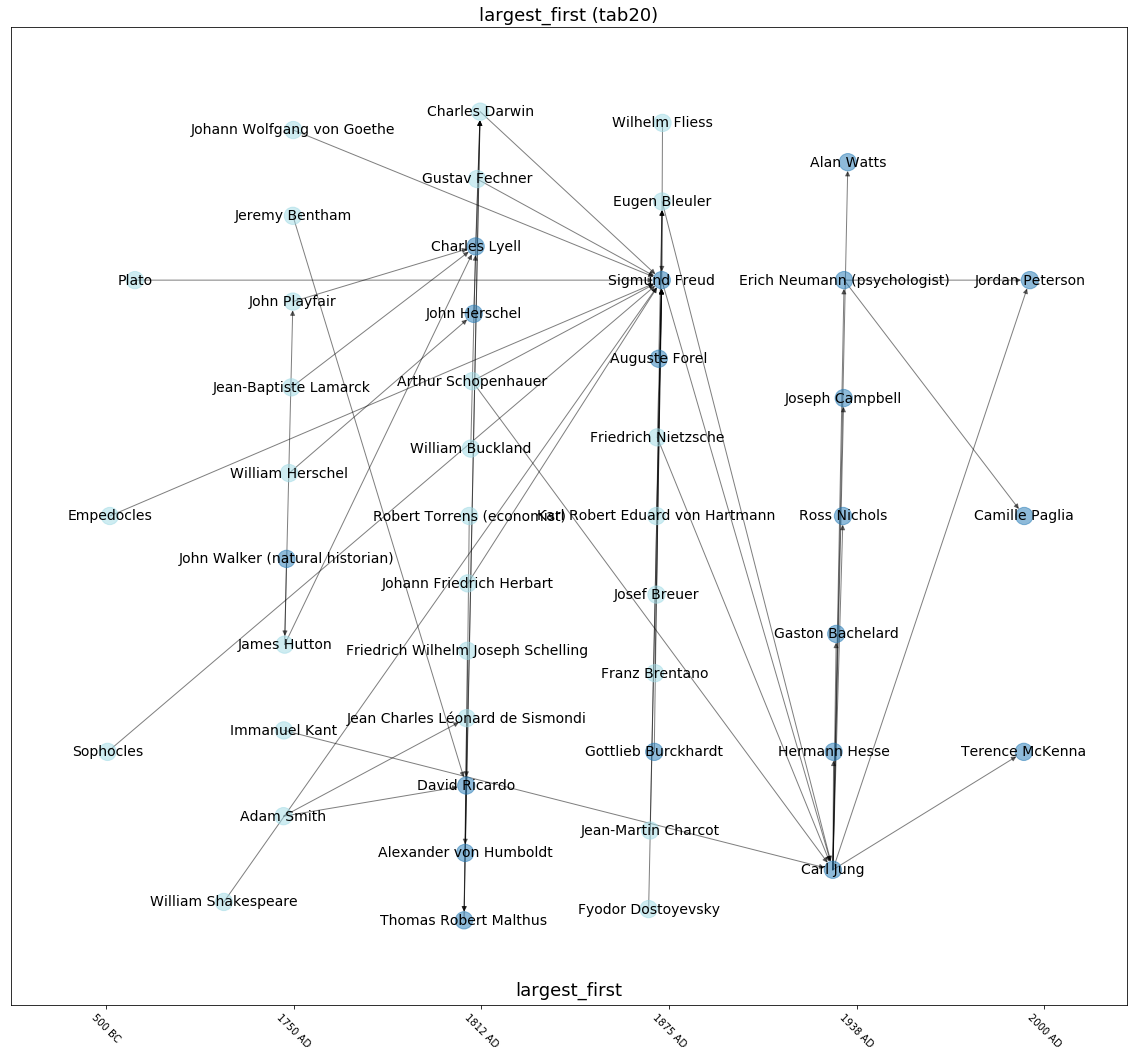

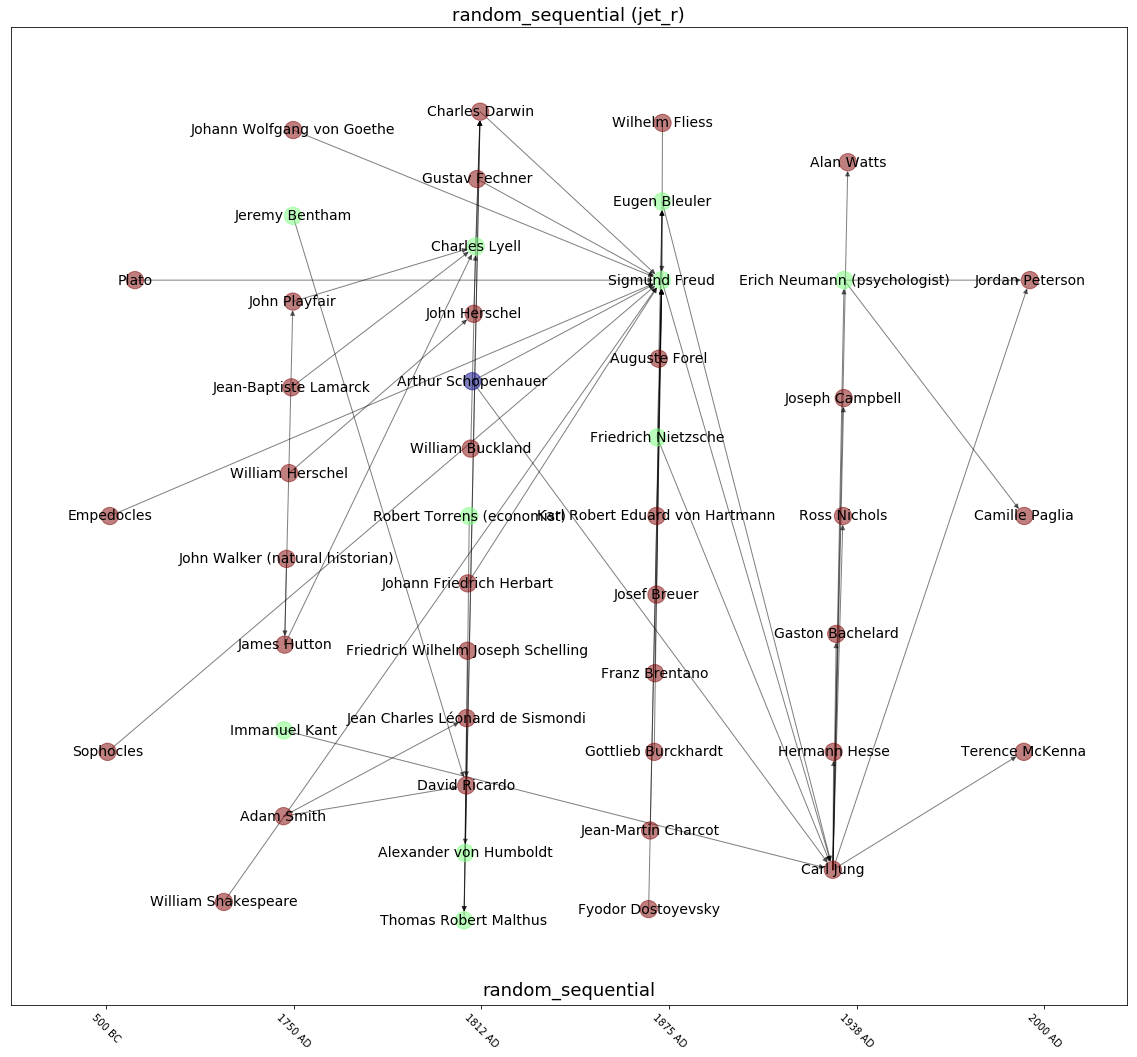

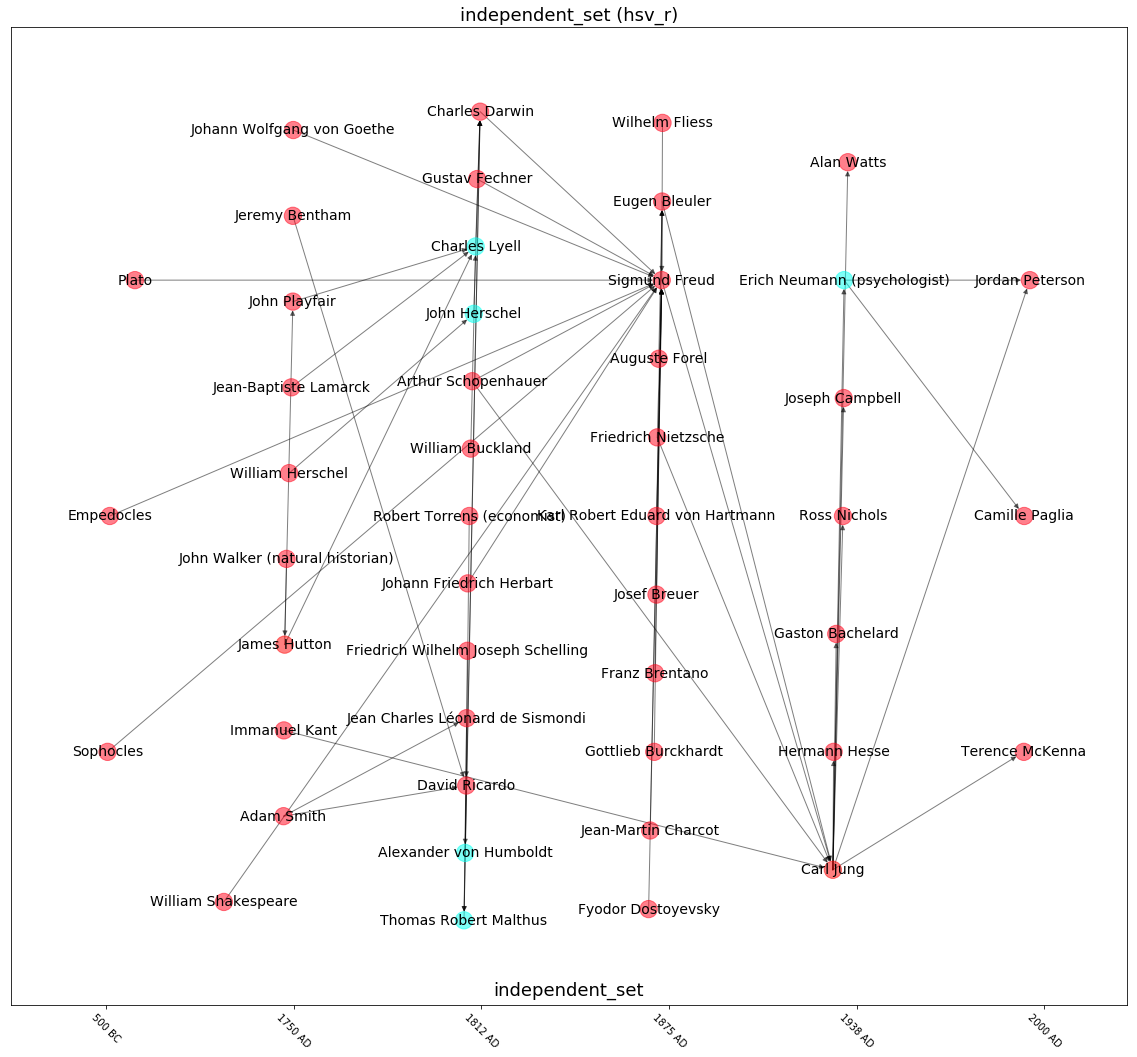

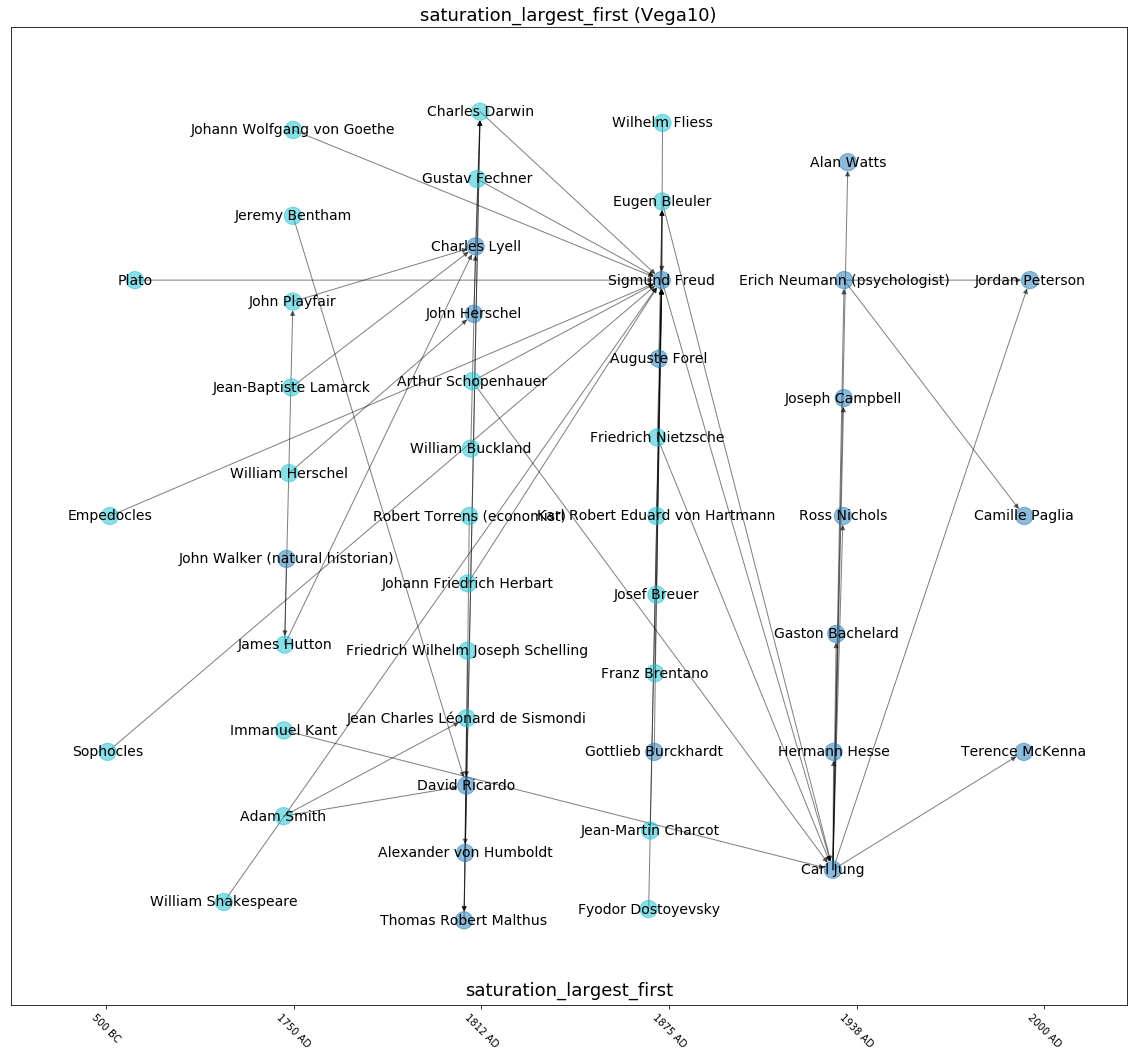

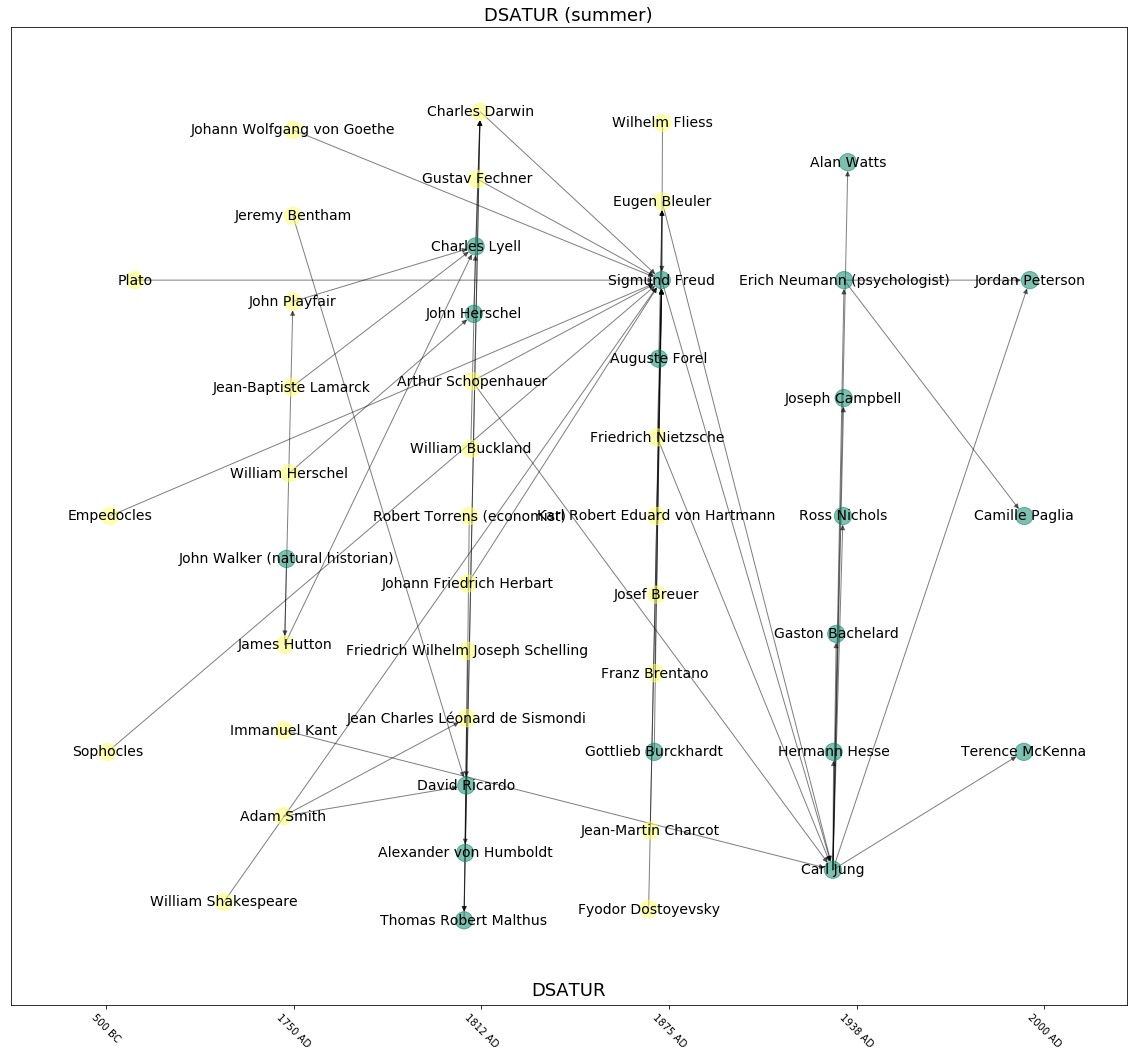

In [13]:

strategy_list = greedy_coloring.STRATEGIES.keys()
for strategy_name in strategy_list:
    try:
        colored_draw_influences_digraph(jung_digraph, pos_dict, strategy_name)
    except Exception as e:
        print(e)

In [21]:

len(jung_digraph.nodes())

47


So, do we need 47 different colors? How about repeating colors based on year of birth?

In [70]:

def centrality_draw_influences_digraph(influences_digraph, birth_year_based_layout=None, coloring_dict=None,
                                       cmap='tab10', plot_title=''):
    
    # Create x axis labels
    xtick_list = [int(round(elem)) for elem in pd.cut(np.array([1750, 2000]), 4, retbins=True)[1]]
    xtick_list = [-500] + xtick_list
    nominal_list = [-500, 0, 500, 1000, 1500, 2000]
    xticklabel_list = []
    bc_regex = re.compile(r'-(\d+)')
    for xtick in xtick_list:
        if xtick == 0:
            xticklabel_list.append('')
        elif xtick < 0:
            xticklabel_list.append(bc_regex.sub(r'\1 BC', str(xtick)))
        elif xtick > 0:
            xticklabel_list.append(str(xtick) + ' AD')
    
    # Create node color
    if coloring_dict is None:
        node_color = 'r'
    else:
        if type(coloring_dict) == dict:
            node_color = [coloring_dict[node] for node in influences_digraph.nodes()]
        else:
            node_color = 'r'
    
    # Set up the figure
    jung_fig = plt.figure(figsize=(10, 9))
    ax = jung_fig.add_subplot(111)
    plt.yticks([], [])
    
    # Set the Strategy name as a text annotation and title
    ax.set_title(plot_title, size=18)
    
    if birth_year_based_layout is None:
        pos = nx.circular_layout(influences_digraph)
    else:
        pos = birth_year_based_layout
        plt.xticks(nominal_list, xticklabel_list, rotation=-45)
    node_collection = nx.draw_networkx_nodes(G=influences_digraph, pos=pos, alpha=0.5,
                                             node_color=node_color, cmap=cmap)
    edge_collection = nx.draw_networkx_edges(G=influences_digraph, pos=pos, alpha=0.5)
    labels_collection = nx.draw_networkx_labels(G=influences_digraph, pos=pos, font_size=10)

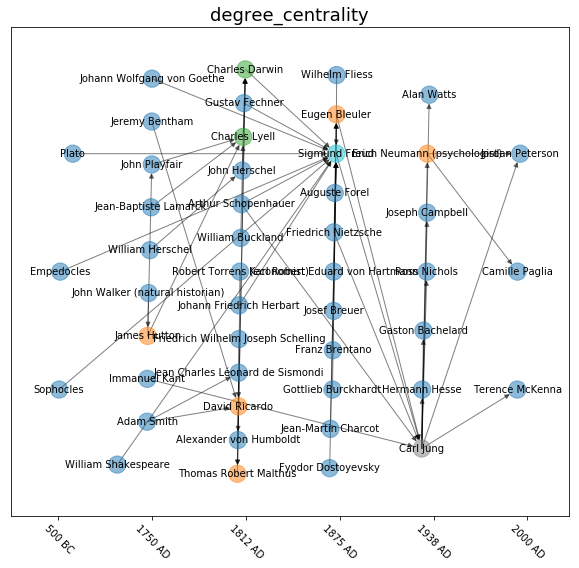

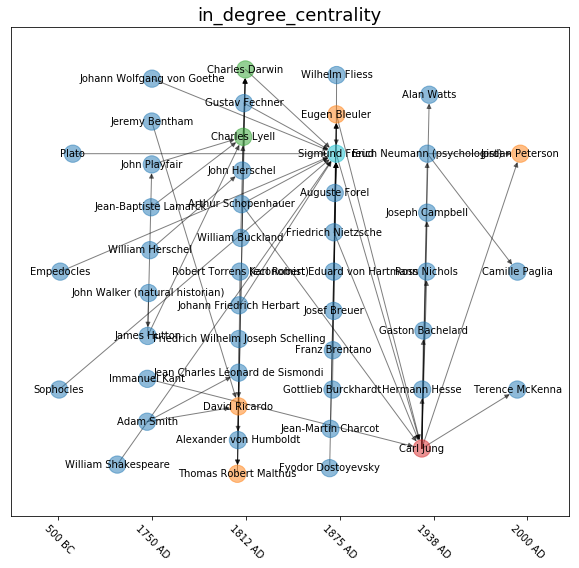

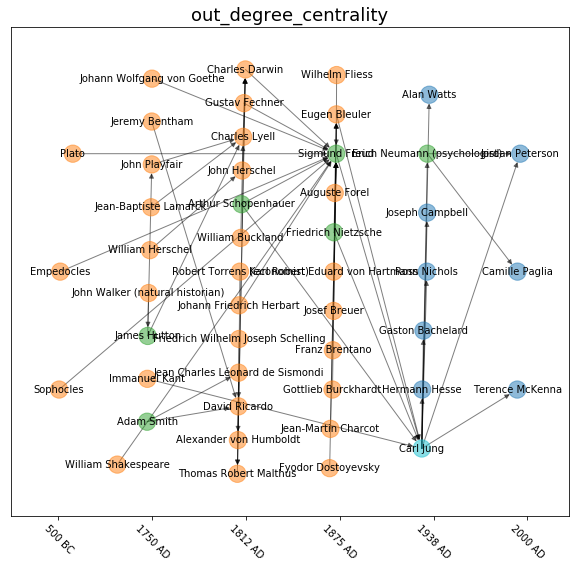

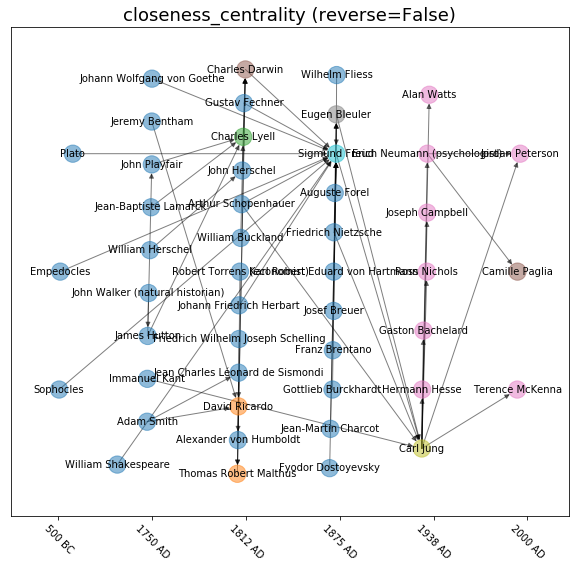

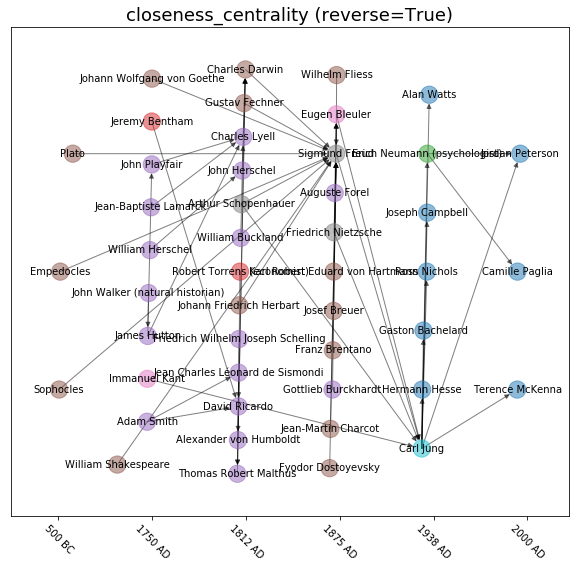

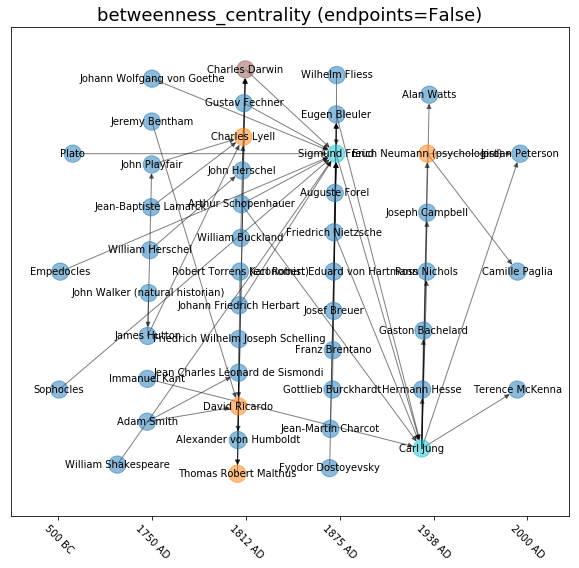

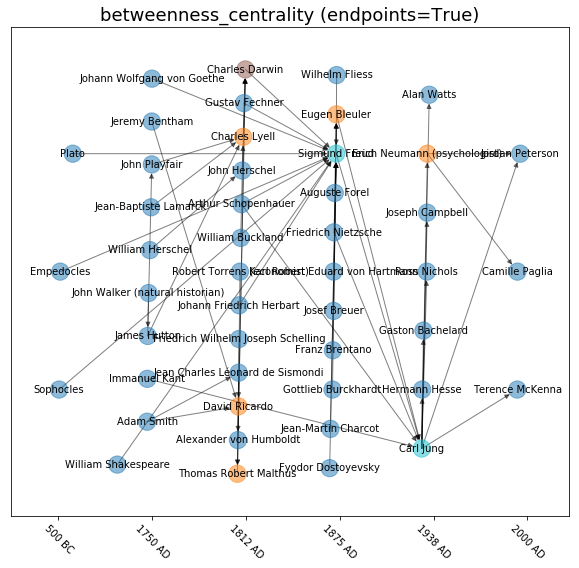

In [82]:

jung_digraph_i = nx.convert_node_labels_to_integers(jung_digraph, first_label=1, ordering='default',
                                                    label_attribute='old_label')
nx.relabel_nodes(jung_digraph_i, nx.get_node_attributes(G=jung_digraph_i, name='old_label'), copy=False)
nodes_dict_list = [nx.degree_centrality(jung_digraph_i), nx.in_degree_centrality(jung_digraph_i),
                   nx.out_degree_centrality(jung_digraph_i),
                   nx.closeness_centrality(jung_digraph_i, reverse=False),
                   nx.closeness_centrality(jung_digraph_i, reverse=True),
                   nx.betweenness_centrality(jung_digraph_i, normalized=True, endpoints=False),
                   nx.betweenness_centrality(jung_digraph_i, normalized=True, endpoints=True)]
title_list = ['degree_centrality', 'in_degree_centrality', 'out_degree_centrality',
              'closeness_centrality (reverse=False)', 'closeness_centrality (reverse=True)',
              'betweenness_centrality (endpoints=False)',
              'betweenness_centrality (endpoints=True)']
for nodes_dict, plot_title in zip(nodes_dict_list, title_list):
    centrality_draw_influences_digraph(jung_digraph_i, birth_year_based_layout=pos_dict, coloring_dict=nodes_dict,
                                       plot_title=plot_title)

In [83]:
nx.betweenness_centrality?

In [40]:

%pprint

dir(nx)

Pretty printing has been turned OFF


['AmbiguousSolution', 'DiGraph', 'ExceededMaxIterations', 'Graph', 'GraphMLReader', 'GraphMLWriter', 'HasACycle', 'LCF_graph', 'MultiDiGraph', 'MultiGraph', 'NetworkXAlgorithmError', 'NetworkXError', 'NetworkXException', 'NetworkXNoCycle', 'NetworkXNoPath', 'NetworkXNotImplemented', 'NetworkXPointlessConcept', 'NetworkXTreewidthBoundExceeded', 'NetworkXUnbounded', 'NetworkXUnfeasible', 'NodeNotFound', 'NotATree', 'OrderedDiGraph', 'OrderedGraph', 'OrderedMultiDiGraph', 'OrderedMultiGraph', 'PowerIterationFailedConvergence', '__author__', '__bibtex__', '__builtins__', '__cached__', '__date__', '__doc__', '__file__', '__license__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'absolute_import', 'adamic_adar_index', 'add_cycle', 'add_path', 'add_star', 'adj_matrix', 'adjacency', 'adjacency_data', 'adjacency_graph', 'adjacency_matrix', 'adjacency_spectrum', 'adjlist', 'algebraic_connectivity', 'algebraicconnectivity', 'algorithms', 'all', 'all_neighbors',

In [80]:

edge_list = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'G')]
G = nx.from_edgelist(edge_list, create_using=nx.Graph())
node_dict = nx.betweenness_centrality(G, k=None, normalized=False, weight=None, endpoints=False, seed=None)
node_dict

{'A': 0.0, 'B': 0.0, 'C': 8.0, 'D': 9.0, 'E': 8.0, 'F': 0.0, 'G': 0.0}